# Laboratorio 10
## Pregunta 2
### Integrantes
- Chavez Balarezo Fabricio
- Eguspiza Jesus

In [89]:
%pip install psycopg2 matplotlib rtree pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Nota :

- Cambiar las credenciales para conectarse a su sistema de postgres local o de preferencia

# Importar librerias

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import os
import rtree
import pandas as pd 

# Conectar a postgres

In [91]:
import psycopg2


# Conexión a la base de datos
conn= psycopg2.connect(
        host="localhost",      # Cambiar si el host es diferente 
        database="BD2 LAB",    # cambiar a la base de uso
        user="postgres",       # cambiar al user donde se haran las pruebas 
        password="PCSE00120",  # cambiar al password de uso
        port="5432"
    )



try:
   

    cursor = conn.cursor()

    
    cursor.execute("SELECT version();")

    version = cursor.fetchone()
    print(f"Versión de PostgreSQL: {version}")

except Exception as error:
    print(f"Error al conectar con PostgreSQL: {error}")




# definir una funcion para ejecutar consultas
def ejecutar_consulta(sql_str, select = False):
    try:
        # Crear un cursor para ejecutar las consultas
        cur = conn.cursor()
        # Ejecutar la consulta
        result = cur.execute(sql_str)   
        print(result)
        # Aplicar commit si la consulta es INSERT, UPDATE o DELETE     
        conn.commit()        
        # Obtener los resultados
        if select:
            rows = cur.fetchall()
            df = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])
            return df  , rows 
        else:
            return result
    except Exception as e:
        print(f"Error: {e}")
        conn.rollback()  # Revertir si hay un error
    finally:
        cur.close()

Versión de PostgreSQL: ('PostgreSQL 15.2, compiled by Visual C++ build 1914, 64-bit',)


# Crear extension cube

In [92]:
sql_str ="""
CREATE SCHEMA IF NOT EXISTS vector;

CREATE EXTENSION IF NOT EXISTS cube SCHEMA vector;

CREATE TABLE IF NOT EXISTS vector.vectors (
    id serial PRIMARY KEY, 
    vector vector.cube, 
    vector_idx vector.cube
);

"""
ejecutar_consulta(sql_str)

None


# Crear indexes gist sobre vector_idx

In [93]:
sql_str ="""
CREATE INDEX idx_vectorind ON vector.vectors USING GIST(vector_idx);
"""
ejecutar_consulta(sql_str)

None


In [94]:
sql_str_cube = """

SELECT * FROM pg_extension WHERE extname = 'cube';

"""

ejecutar_consulta(sql_str_cube)

None


# Insertar valores en vectors 

In [95]:
sql_str ="""
DELETE FROM vector.vectors;

INSERT INTO vector.vectors(id, vector)
    SELECT id,
           vector.cube(ARRAY[round(random()*1000),
                      round(random()*1000),
                      round(random()*1000),
                      round(random()*1000)]::float8[])
      FROM generate_series(1, 100000) id;

UPDATE vector.vectors SET vector_idx = vector;



"""
ejecutar_consulta(sql_str)

None


In [96]:
sql_str ="""
select * from vector.vectors  limit 5 
"""
ejecutar_consulta(sql_str, True)

None


(   id                vector            vector_idx
 0   1  (858, 154, 554, 519)  (858, 154, 554, 519)
 1   2   (64, 981, 738, 276)   (64, 981, 738, 276)
 2   3  (127, 349, 747, 310)  (127, 349, 747, 310)
 3   4  (429, 875, 820, 790)  (429, 875, 820, 790)
 4   5   (69, 524, 552, 842)   (69, 524, 552, 842),
 [(1, '(858, 154, 554, 519)', '(858, 154, 554, 519)'),
  (2, '(64, 981, 738, 276)', '(64, 981, 738, 276)'),
  (3, '(127, 349, 747, 310)', '(127, 349, 747, 310)'),
  (4, '(429, 875, 820, 790)', '(429, 875, 820, 790)'),
  (5, '(69, 524, 552, 842)', '(69, 524, 552, 842)')])

# Graficadores 

In [97]:
import matplotlib.pyplot as plt

def plot_test_log(data_points, time_index, time_no_index  , numd = "2" ):
    """
    Función para graficar y comparar los tiempos de ejecución con y sin índice,
    usando una escala logarítmica en el eje x.

    Parameteros:
    - data_points (list): Lista de tamaños de datos utilizados.
    - time_index (list): Lista de tiempos de ejecución con índice.
    - time_no_index (list): Lista de tiempos de ejecución sin índice.
    """
    plt.figure(figsize=(10, 6))
    
    
    plt.plot(data_points, time_index, label="Con Índice", marker='o', linestyle='-')
    
   
    plt.plot(data_points, time_no_index, label="Sin Índice", marker='o', linestyle='--')
    
   
    plt.xscale('log')
    plt.yscale('log')
    
    
    plt.xlabel(f"Número de datos para vectores de {numd}-dimensiones en tabla (Escala Logarítmica)")
    plt.ylabel("Tiempo de Ejecución (ms) (Escala Logarítmica)")
    plt.title("Comparación de Tiempos de Ejecución: Con Índice vs Sin Índice (Escala Logarítmica)")
    

    plt.legend(loc="upper left")
    
  
    plt.grid(True, which="both", ls="--")
    

    plt.show()




def plot_test(data_points, time_index, time_no_index , numd = "2" ):
    """
    Función para graficar y comparar los tiempos de ejecución con y sin índice,
    usando una escala logarítmica en el eje x.

    Parameteros:
    - data_points (list): Lista de tamaños de datos utilizados.
    - time_index (list): Lista de tiempos de ejecución con índice.
    - time_no_index (list): Lista de tiempos de ejecución sin índice.
    """
    plt.figure(figsize=(10, 6))
    
    
    plt.plot(data_points, time_index, label="Con Índice", marker='o', linestyle='-')
    
   
    plt.plot(data_points, time_no_index, label="Sin Índice", marker='o', linestyle='--')
    
       
    plt.xlabel(f"Número de datos para vectores de {numd}-dimensiones en tabla")
    plt.ylabel("Tiempo de Ejecución (ms)")
    plt.title("Comparación de Tiempos de Ejecución: Con Índice vs Sin Índice (escala normal)")
    

    plt.legend(loc="upper left")
    
  
    plt.grid(True, which="both", ls="--")
    

    plt.show()




# Time extractor

In [98]:
def extract_execution_time(result):
  
    for row in result:
        if "Execution Time" in row[0]:
            # Extraer el tiempo de ejecución
            time_str = row[0].split(":")[1].strip().replace(" ms", "")
            return float(time_str)
    

    return None

# Definir querys especificas

In [99]:

import random

def create_query_vector(sample_size = 100,dimension=2, query="insert"):
   
    random_values = ', '.join([str(random.randint(100, 999)) for _ in range(dimension)])

    if query == "insert":
        # Inserta 1000 filas con vectores de dimensión especificada
        sql_str = f"""
            DELETE FROM vector.vectors;

            INSERT INTO vector.vectors(id, vector)
                SELECT id,
                       cube(ARRAY[
                           {', '.join(['round(random()*1000)' for _ in range(dimension)] )}
                       ]::float8[])
                FROM generate_series(1, {sample_size}) id;

            UPDATE vector.vectors SET vector_idx = vector;
        """
        return sql_str
    elif query == "drop_index":
        sql_str = f"""
            DROP INDEX IF EXISTS vector.idx_vectorind;
        """
        return sql_str
    elif query == "create_index":
        sql_str = f"""
            CREATE INDEX idx_vectorind ON vector.vectors USING GIST(vector_idx);
        """
        return sql_str
    elif query == "time_index":
        
        sql_str = f""" 
            EXPLAIN ANALYZE
            SELECT id, vector_idx,
                   cube_distance(vector_idx, '({random_values})') as D
            FROM vector.vectors
            ORDER BY vector_idx <-> '({random_values})'
            LIMIT 5;
        """    
        return sql_str
    elif query == "time_no_index":
      
        sql_str = f""" 
            EXPLAIN ANALYZE
            SELECT id, vector,
                   cube_distance(vector, '({random_values})') as dist
            FROM vector.vectors
            ORDER BY vector <-> '({random_values})'
            LIMIT 5;
        """
        return sql_str


# Tester 

In [100]:

def Dtest (data_points):
    time_index = []
    time_no_index= []

    sql_str = """
        SET search_path TO vector, public;
        """
    ejecutar_consulta(sql_str)
    for sample,dimensions in data_points:
        new_query = create_query_vector(sample_size=sample, dimension = dimensions,query="drop_index")
        ejecutar_consulta(new_query)
        new_query = create_query_vector(sample_size=sample, dimension = dimensions ,query= "insert")
        ejecutar_consulta(new_query)
        new_query = create_query_vector(sample_size=sample, dimension = dimensions,query="create_index")

        #definir query con index y sin index 
        query_index = create_query_vector(sample_size=sample, dimension = dimensions,query="time_index")
        query_no_index = create_query_vector(sample_size=sample, dimension = dimensions , query="time_no_index")
        
        #Ejectuar consulta con index y extraer su tiempo 
        df , result = ejecutar_consulta(query_index , True)
        time_index.append(extract_execution_time(result))


         #Ejectuar consulta sin index y extraer su tiempo 
        df , result = ejecutar_consulta(query_no_index , True)
        time_no_index.append(extract_execution_time(result))


    return time_index , time_no_index    



# Inciar pruebas variando cantidad de datos 

In [101]:
data_points_size = [100  , 1000 , 10000 , 10000 , 100000 , 1000000]    
data_points_dimensions = data_points_dimensions = [val for val in range(2, 22, 2)]


test_vector = []

for dimensions in data_points_dimensions:
    # Creamos una lista temporal para almacenar las combinaciones (sample_size, dimensions)
    temp_list = []
    for sample_size in data_points_size:
        temp_list.append((sample_size, dimensions))  # Usamos una tupla para almacenar ambos valores

    test_vector.append(temp_list)


       

# Graficas comparativas 

### Dimensiones = 2

In [102]:
time_index ,time_no_index= Dtest(test_vector[0])

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


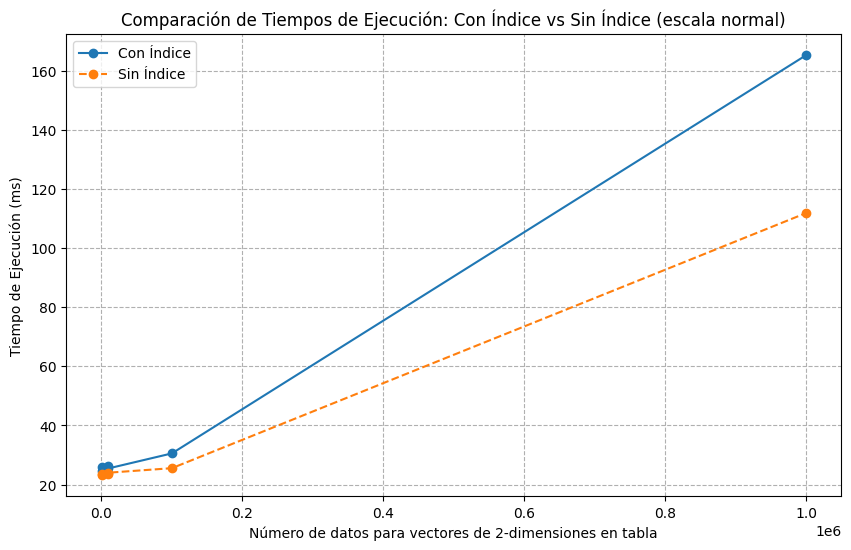

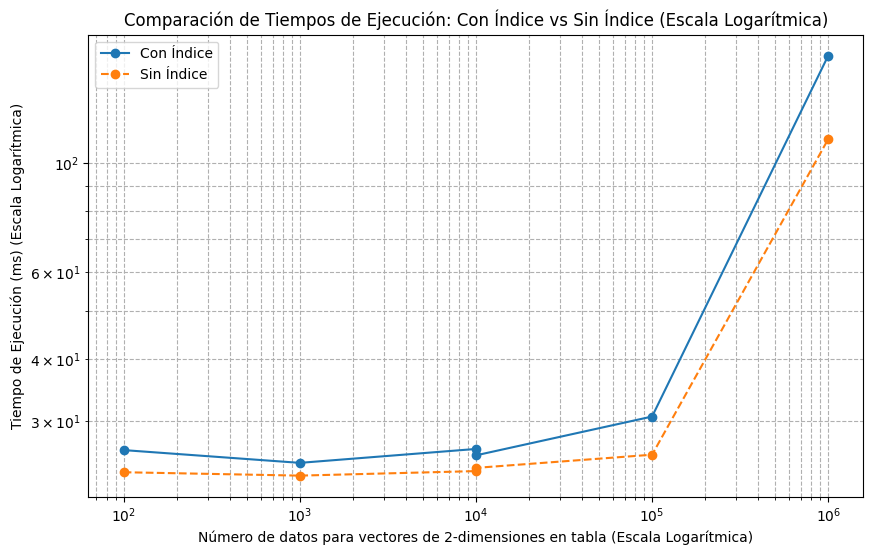

In [103]:
plot_test(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="2")
plot_test_log(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="2")

### Dimensiones = 4

In [104]:
time_index ,time_no_index= Dtest(test_vector[1])


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


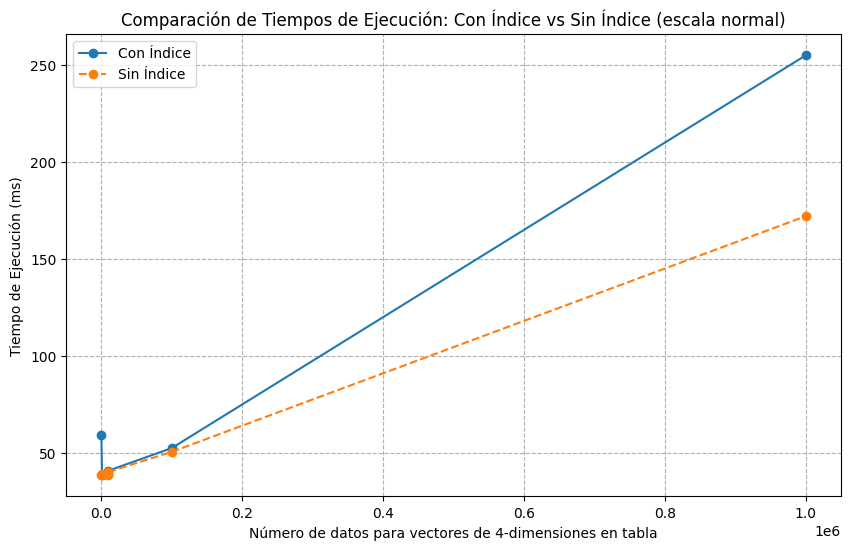

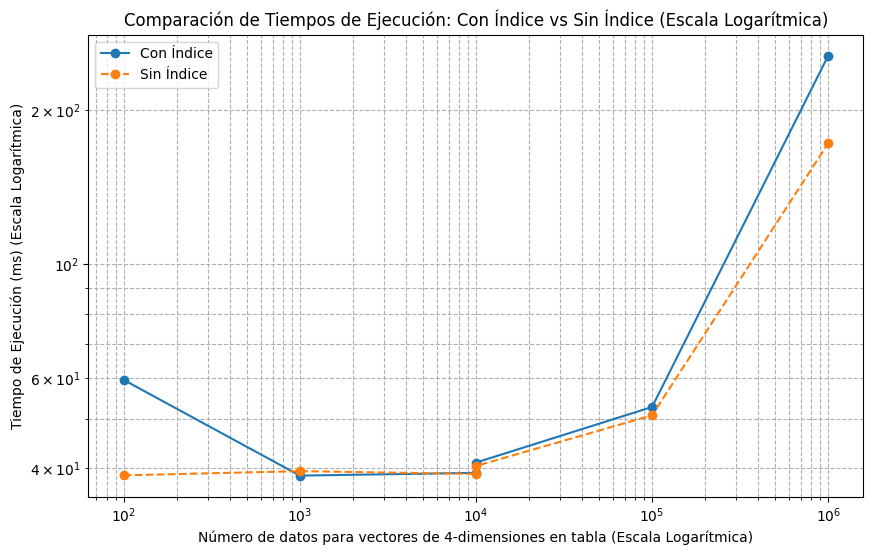

In [105]:
plot_test(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="4")
plot_test_log(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="4")

### Dimensiones = 6

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


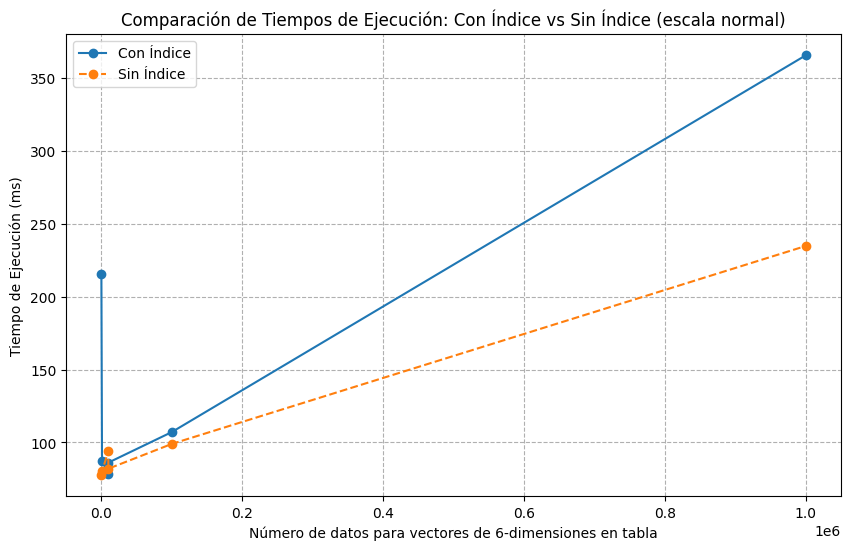

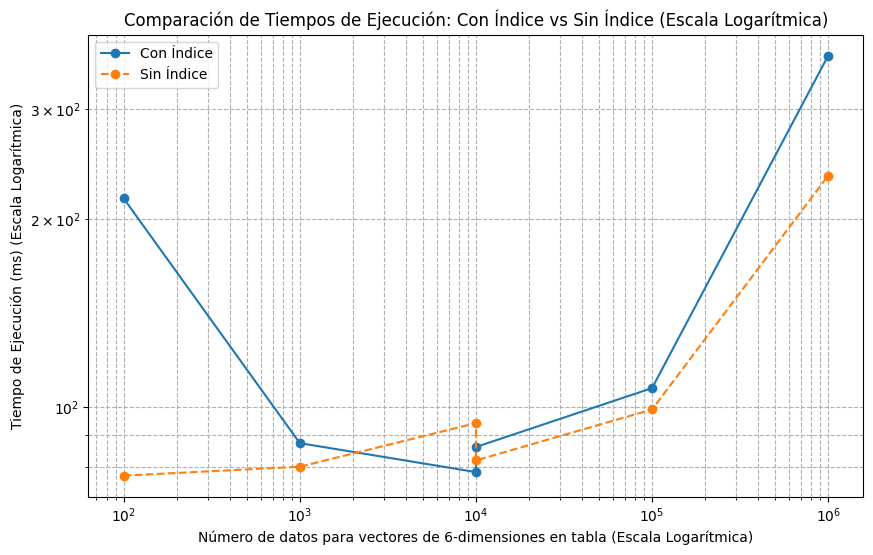

In [106]:
time_index ,time_no_index= Dtest(test_vector[2])
plot_test(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="6")
plot_test_log(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="6")

### Dimensiones = 8

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


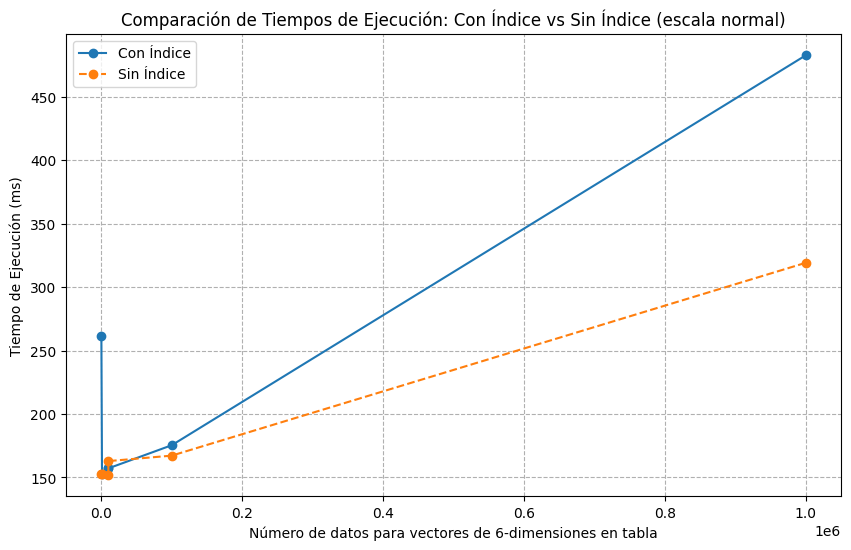

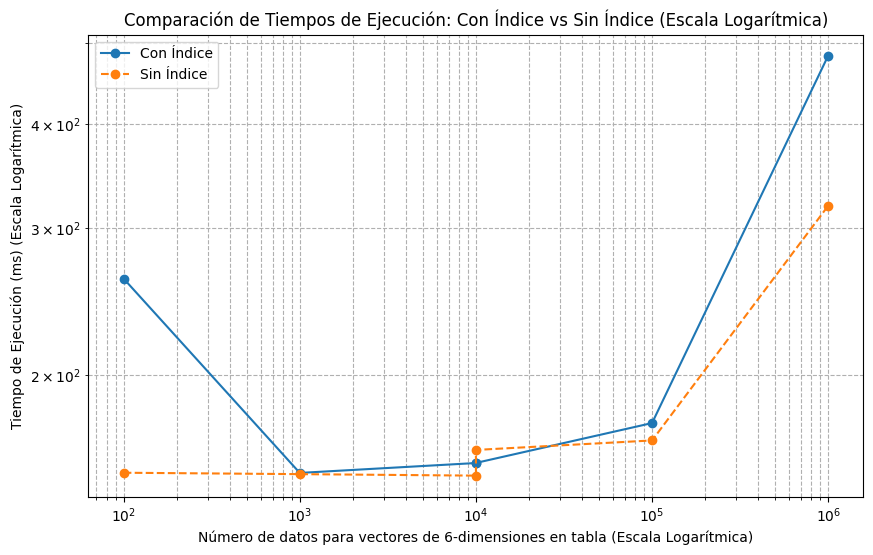

In [107]:
time_index ,time_no_index= Dtest(test_vector[3])
plot_test(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="6")
plot_test_log(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="6")

### Dimensiones = 10

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


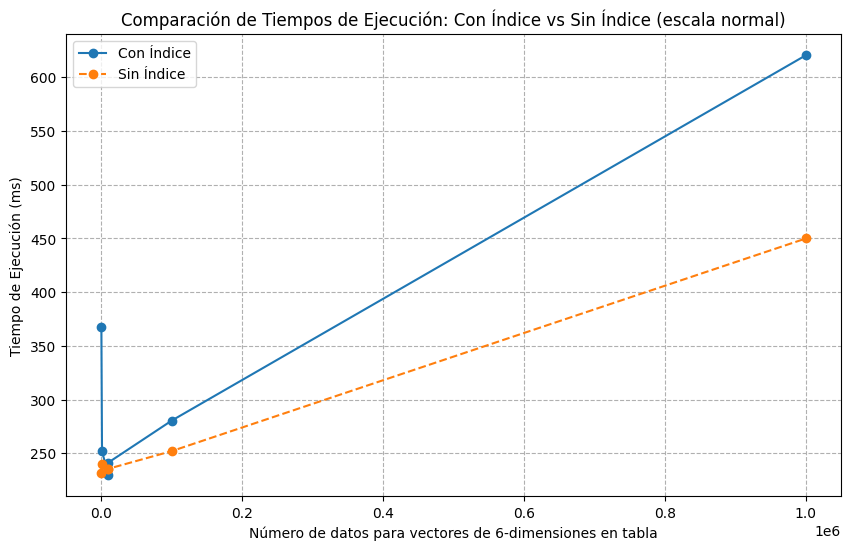

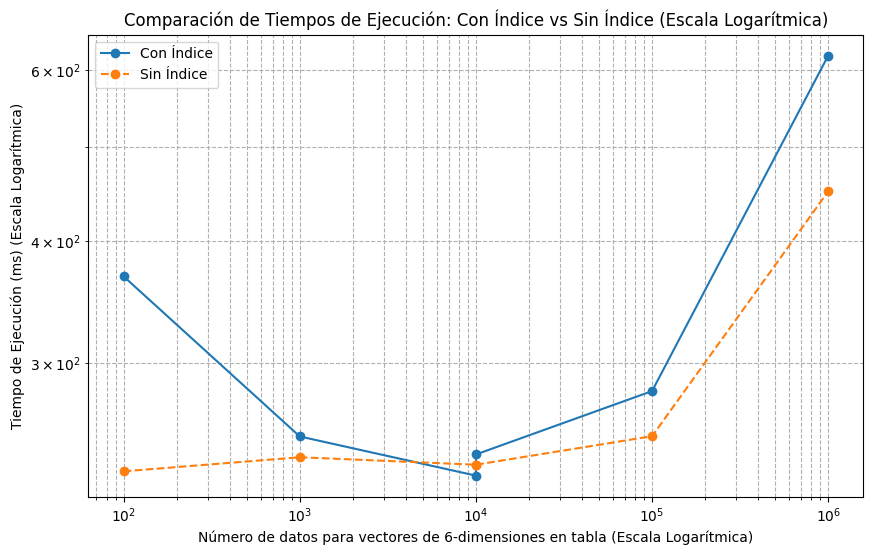

In [108]:
time_index ,time_no_index= Dtest(test_vector[4])
plot_test(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="10")
plot_test_log(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="10")

### Dimensiones = 12

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


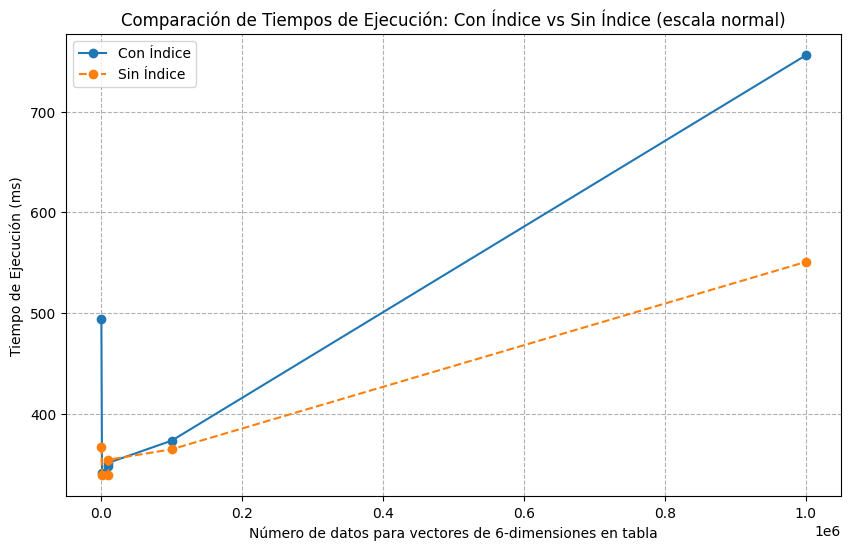

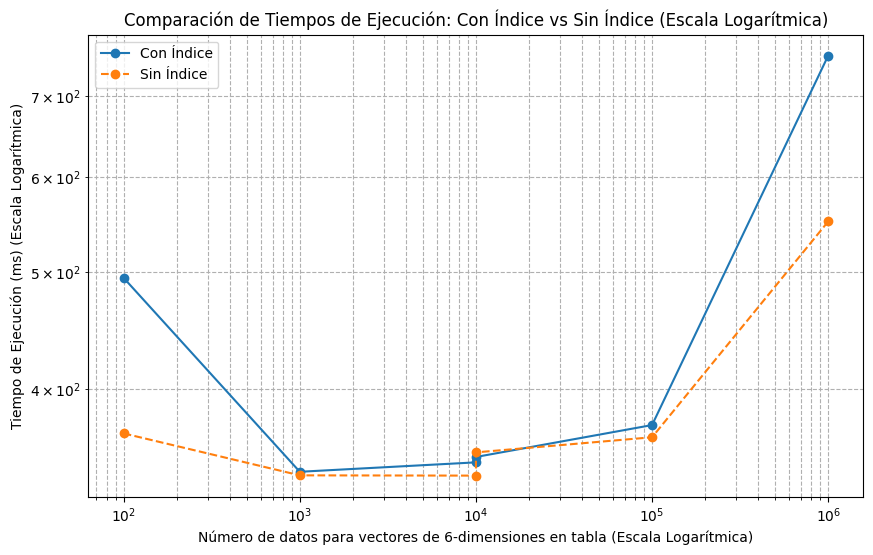

In [109]:
time_index ,time_no_index= Dtest(test_vector[5])
plot_test(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="12")
plot_test_log(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="12")

### Dimensiones = 14

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


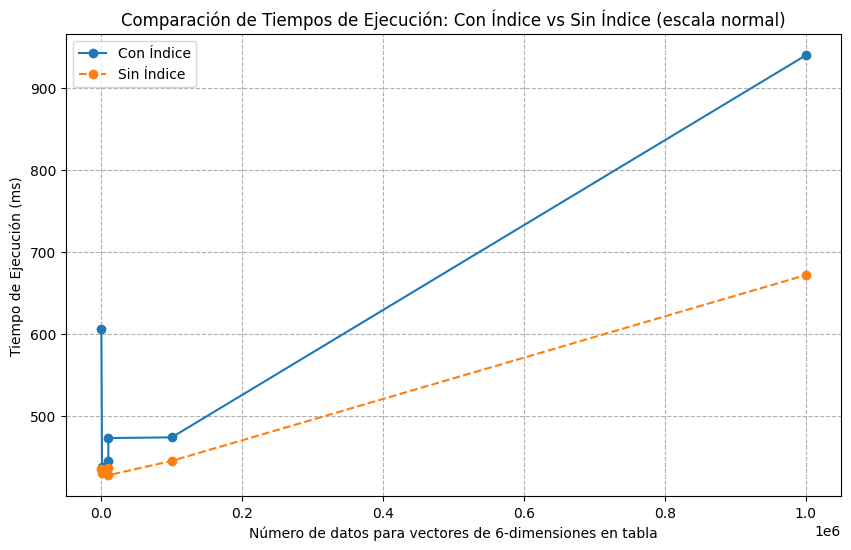

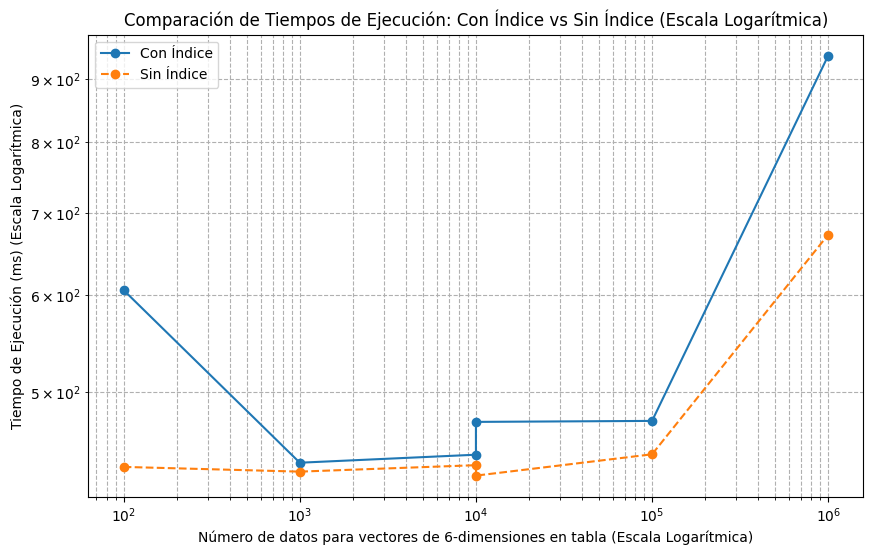

In [110]:
time_index ,time_no_index= Dtest(test_vector[6])
plot_test(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="14")
plot_test_log(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="14")

### Dimensiones = 16

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


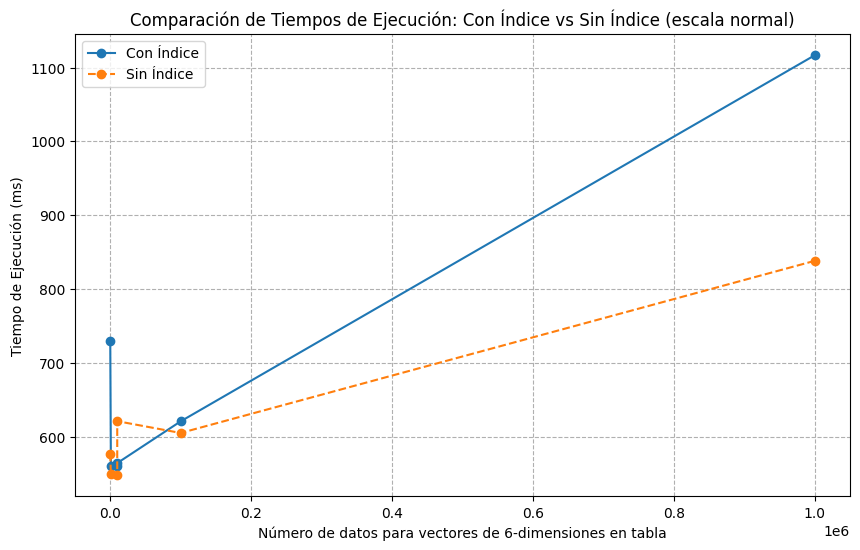

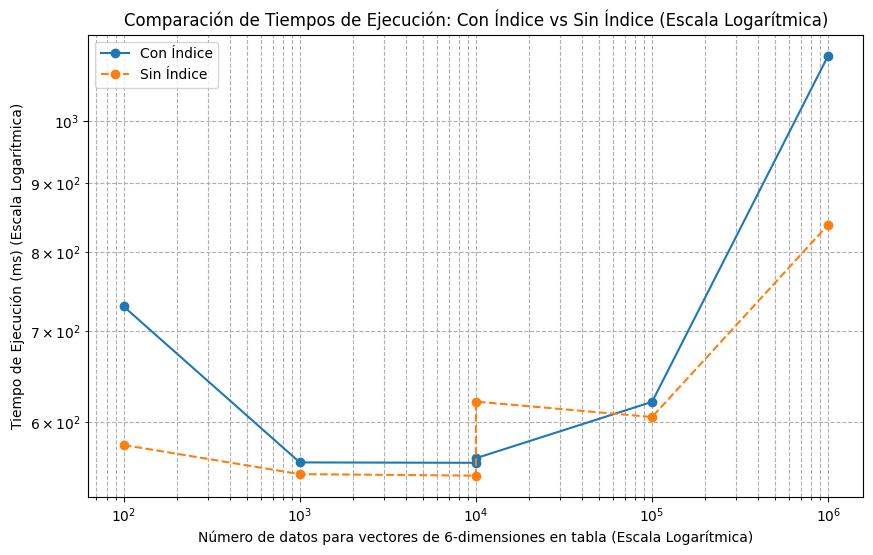

In [111]:
time_index ,time_no_index= Dtest(test_vector[7])
plot_test(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="16")
plot_test_log(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="16")

### Dimensiones = 18

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


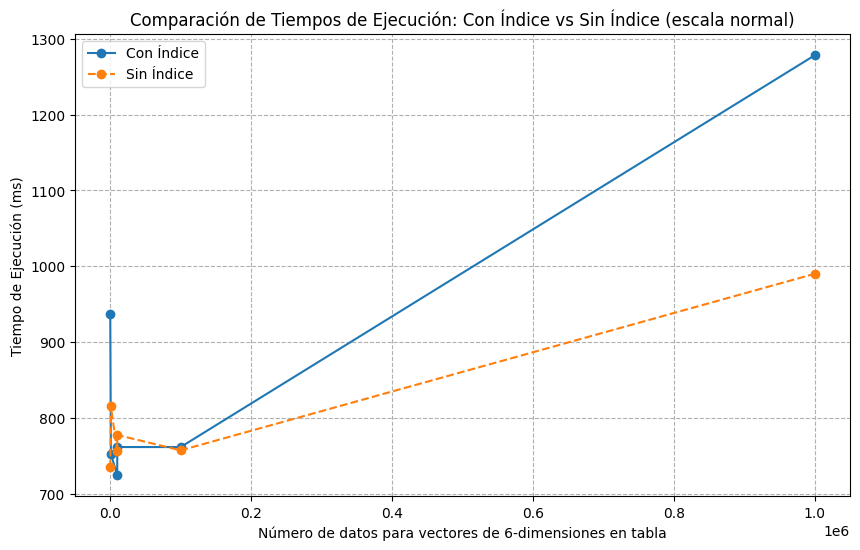

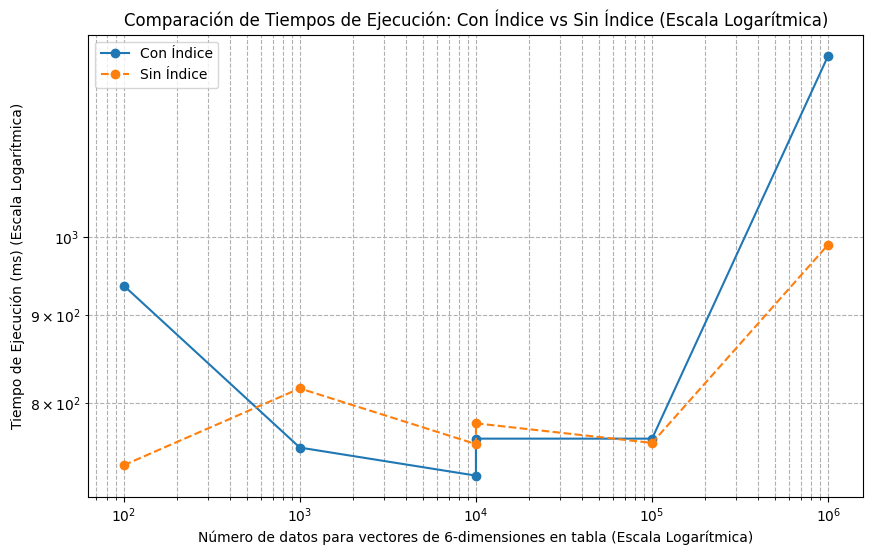

In [112]:
time_index ,time_no_index= Dtest(test_vector[8])
plot_test(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="18")
plot_test_log(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="18")

### Dimensiones = 20

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


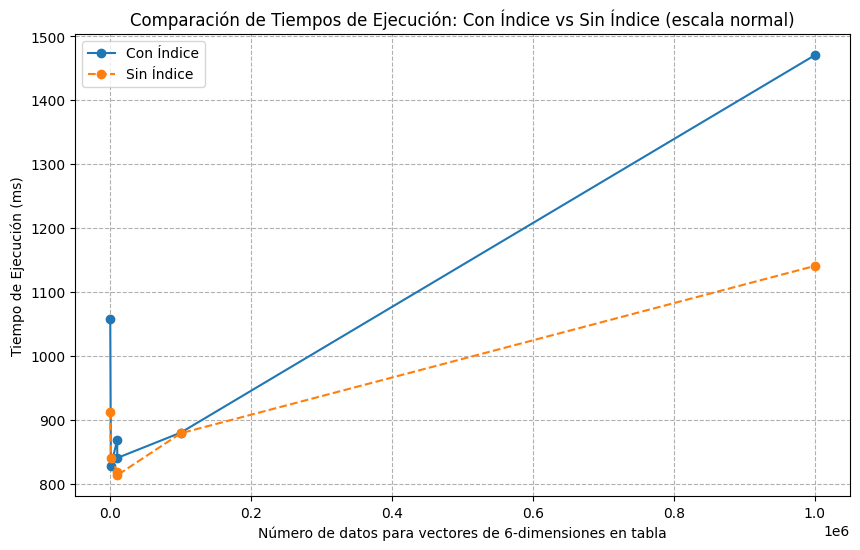

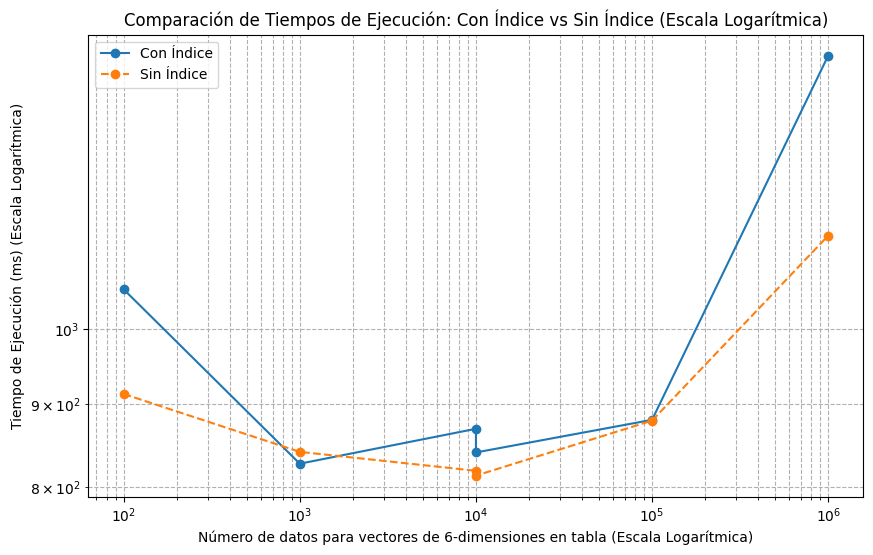

In [113]:
time_index ,time_no_index= Dtest(test_vector[9])
plot_test(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="20")
plot_test_log(data_points=data_points_size ,time_index=time_index, time_no_index=time_no_index,numd="20")